In [1]:
import pandas as pd
import numpy as np
import bokeh
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
import matplotlib.pyplot as plt

In [2]:
# get historical data up to Jun 11, 2023
bitcoin_df = pd.read_csv("bokeh/data/bitcoin2.csv")
bitcoin_df = bitcoin_df.dropna()
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
bitcoin_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
bitcoin_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [5]:
bitcoin_df['datetime'] = pd.to_datetime(bitcoin_df['Date']).dt.date.unique()

In [6]:
bitcoin_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,datetime
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,2014-09-17
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,2014-09-18
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,2014-09-19
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,2014-09-20
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,2014-09-21
5,9/22/2014,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0,2014-09-22
6,9/23/2014,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0,2014-09-23
7,9/24/2014,435.751007,436.112000,421.131989,423.204987,423.204987,30627700.0,2014-09-24
8,9/25/2014,423.156006,423.519989,409.467987,411.574005,411.574005,26814400.0,2014-09-25
9,9/26/2014,411.428986,414.937988,400.009003,404.424988,404.424988,21460800.0,2014-09-26


In [7]:
bitcoin_df['date_formatted'] = bitcoin_df['datetime'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [8]:
bitcoin_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,date_formatted
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,2014-09-17,2014-09-17
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,2014-09-18,2014-09-18
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,2014-09-19,2014-09-19
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,2014-09-20,2014-09-20
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,2014-09-21,2014-09-21
5,9/22/2014,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0,2014-09-22,2014-09-22
6,9/23/2014,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0,2014-09-23,2014-09-23
7,9/24/2014,435.751007,436.112000,421.131989,423.204987,423.204987,30627700.0,2014-09-24,2014-09-24
8,9/25/2014,423.156006,423.519989,409.467987,411.574005,411.574005,26814400.0,2014-09-25,2014-09-25
9,9/26/2014,411.428986,414.937988,400.009003,404.424988,404.424988,21460800.0,2014-09-26,2014-09-26


In [9]:
# get difference each day at close
bitcoin_df['day_diff'] = bitcoin_df['Close'].diff()

In [10]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,date_formatted,day_diff
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,2014-09-17,2014-09-17,NaN
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,2014-09-18,2014-09-18,-32.894013
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,2014-09-19,2014-09-19,-29.644012
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,2014-09-20,2014-09-20,14.108002
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,2014-09-21,2014-09-21,-10.082978


In [11]:
bitcoin_df["SMA30"] = bitcoin_df["Close"].rolling(30, closed='left', min_periods=30).mean()

In [12]:
bitcoin_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,date_formatted,day_diff,SMA30
3186,6/8/2023,26347.65430,26797.51367,26246.66406,26508.21680,26508.21680,1.190482e+10,2023-06-08,2023-06-08,162.21875,27029.092448
3187,6/9/2023,26505.92383,26770.28906,26339.31445,26480.37500,26480.37500,1.101555e+10,2023-06-09,2023-06-09,-27.84180,26990.740495
3188,6/10/2023,26481.76172,26531.04492,25501.83594,25851.24023,25851.24023,1.987293e+10,2023-06-10,2023-06-10,-629.13477,26952.694466
3189,6/11/2023,25854.03125,26203.43945,25668.98633,25940.16797,25940.16797,1.073261e+10,2023-06-11,2023-06-11,88.92774,26914.376172
3190,6/12/2023,25938.01563,25993.76172,25702.99219,25768.28320,25768.28320,1.143134e+10,2023-06-12,2023-06-12,-171.88477,26885.548763


In [13]:
# Create column for daily difference from past rolling
bitcoin_df["ROL_DIFF"] = bitcoin_df["Close"] - bitcoin_df["SMA30"]

In [14]:
bitcoin_df.tail()
# this shows how much each day lost or gained from its 30 day average

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,date_formatted,day_diff,SMA30,ROL_DIFF
3186,6/8/2023,26347.65430,26797.51367,26246.66406,26508.21680,26508.21680,1.190482e+10,2023-06-08,2023-06-08,162.21875,27029.092448,-520.875648
3187,6/9/2023,26505.92383,26770.28906,26339.31445,26480.37500,26480.37500,1.101555e+10,2023-06-09,2023-06-09,-27.84180,26990.740495,-510.365495
3188,6/10/2023,26481.76172,26531.04492,25501.83594,25851.24023,25851.24023,1.987293e+10,2023-06-10,2023-06-10,-629.13477,26952.694466,-1101.454236
3189,6/11/2023,25854.03125,26203.43945,25668.98633,25940.16797,25940.16797,1.073261e+10,2023-06-11,2023-06-11,88.92774,26914.376172,-974.208202
3190,6/12/2023,25938.01563,25993.76172,25702.99219,25768.28320,25768.28320,1.143134e+10,2023-06-12,2023-06-12,-171.88477,26885.548763,-1117.265563


In [15]:
# Calculate the percentage change from 30 day average to current day
# this is how much it is different from the 30-day average as a percent of the 30-day average
bitcoin_df["PCT_ROL_DIF"] = (bitcoin_df["ROL_DIFF"]) / bitcoin_df["SMA30"]

In [16]:
bitcoin_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,date_formatted,day_diff,SMA30,ROL_DIFF,PCT_ROL_DIF
3186,6/8/2023,26347.65430,26797.51367,26246.66406,26508.21680,26508.21680,1.190482e+10,2023-06-08,2023-06-08,162.21875,27029.092448,-520.875648,-0.019271
3187,6/9/2023,26505.92383,26770.28906,26339.31445,26480.37500,26480.37500,1.101555e+10,2023-06-09,2023-06-09,-27.84180,26990.740495,-510.365495,-0.018909
3188,6/10/2023,26481.76172,26531.04492,25501.83594,25851.24023,25851.24023,1.987293e+10,2023-06-10,2023-06-10,-629.13477,26952.694466,-1101.454236,-0.040866
3189,6/11/2023,25854.03125,26203.43945,25668.98633,25940.16797,25940.16797,1.073261e+10,2023-06-11,2023-06-11,88.92774,26914.376172,-974.208202,-0.036197
3190,6/12/2023,25938.01563,25993.76172,25702.99219,25768.28320,25768.28320,1.143134e+10,2023-06-12,2023-06-12,-171.88477,26885.548763,-1117.265563,-0.041556


In [17]:
# Get the 50 days with the largest increase from the rolling average
bitcoin_df.nlargest(50, "PCT_ROL_DIF")

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,date_formatted,day_diff,SMA30,ROL_DIFF,PCT_ROL_DIF
1177,12/7/2017,14266.099610,17899.699220,14057.299810,17899.699220,17899.699220,1.795070e+10,2017-12-07,2017-12-07,3608.199220,8758.969971,9140.729249,1.043585
1178,12/8/2017,17802.900390,18353.400390,14336.900390,16569.400390,16569.400390,2.113600e+10,2017-12-08,2017-12-08,-1330.298830,9117.480616,7451.919774,0.817322
1181,12/11/2017,15427.400390,17513.900390,15404.799810,16936.800780,16936.800780,1.215390e+10,2017-12-11,2017-12-11,1481.400390,9983.533643,6953.267137,0.696474
1182,12/12/2017,16919.800780,17781.800780,16571.599610,17415.400390,17415.400390,1.460380e+10,2017-12-12,2017-12-12,478.599610,10336.173666,7079.226724,0.684898
1176,12/6/2017,11923.400390,14369.099610,11923.400390,14291.500000,14291.500000,1.265630e+10,2017-12-06,2017-12-06,2374.799800,8516.678630,5774.821370,0.678060
1186,12/16/2017,17760.300780,19716.699220,17515.300780,19497.400390,19497.400390,1.274060e+10,2017-12-16,2017-12-16,1790.500000,11723.961996,7773.438394,0.663039
1179,12/9/2017,16523.300780,16783.000000,13674.900390,15178.200200,15178.200200,1.391130e+10,2017-12-09,2017-12-09,-1391.200190,9421.137631,5757.062569,0.611079
2305,1/8/2021,39381.765630,41946.738280,36838.636720,40797.609380,40797.609380,8.810752e+10,2021-01-08,2021-01-08,1426.566410,25525.302084,15272.307296,0.598320
1180,12/10/2017,15168.400390,15850.599610,13226.599610,15455.400390,15455.400390,1.343330e+10,2017-12-10,2017-12-10,277.200190,9688.958302,5766.442088,0.595156
2304,1/7/2021,36833.875000,40180.367190,36491.191410,39371.042970,39371.042970,8.476214e+10,2021-01-07,2021-01-07,2546.679690,24823.638802,14547.404168,0.586030


In [18]:
# Get the 50 days with the largest decrease from the rolling average
bitcoin_df.nsmallest(50, "PCT_ROL_DIF")

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,date_formatted,day_diff,SMA30,ROL_DIFF,PCT_ROL_DIF
2003,3/12/2020,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,5.398036e+10,2020-03-12,2020-03-12,-2940.642090,9234.699495,-4263.911409,-0.461727
1237,2/5/2018,8270.540039,8364.839844,6756.680176,6955.270020,6955.270020,9.285290e+09,2018-02-05,2018-02-05,-1321.739746,12141.217026,-5185.947006,-0.427136
2005,3/14/2020,5573.077637,5625.226563,5125.069336,5200.366211,5200.366211,3.615451e+10,2020-03-14,2020-03-14,-363.340820,8901.372965,-3701.006754,-0.415779
2007,3/16/2020,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,4.536803e+10,2020-03-16,2020-03-16,-377.834961,8570.245801,-3555.765821,-0.414897
119,1/14/2015,223.893997,223.893997,171.509995,178.102997,178.102997,9.763870e+07,2015-01-14,2015-01-14,-47.757995,304.075832,-125.972835,-0.414281
2004,3/13/2020,5017.831055,5838.114746,4106.980957,5563.707031,5563.707031,7.415677e+10,2020-03-13,2020-03-13,592.918945,9060.117887,-3496.410856,-0.385912
2006,3/15/2020,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,3.399789e+10,2020-03-15,2020-03-15,191.948730,8734.239176,-3341.924235,-0.382623
2008,3/17/2020,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,3.862264e+10,2020-03-17,2020-03-17,211.149415,8407.747640,-3182.118245,-0.378475
2009,3/18/2020,5227.113770,5331.833984,5069.335938,5238.438477,5238.438477,3.787880e+10,2020-03-18,2020-03-18,12.809082,8250.787500,-3012.349023,-0.365098
1529,11/24/2018,4347.689941,4413.089844,3795.159912,3880.760010,3880.760010,4.679500e+09,2018-11-24,2018-11-24,-466.349853,5966.190332,-2085.430322,-0.349541


In [19]:
# mark significant changes both increases and decreases in column "sig_chg"
conditions = [
    (bitcoin_df['PCT_ROL_DIF'] <= -0.2), # signficant decrease from rolling average
    (bitcoin_df['PCT_ROL_DIF'] > -0.2) & (bitcoin_df['PCT_ROL_DIF'] <= 0.2), # not a significant change
    (bitcoin_df['PCT_ROL_DIF'] > 0.2) # significant increase from rolling average
    ]

# list of values we want to assign for each condition
values = [-1,0,1]

# create a new column and use np.select to assign values to it using our list as arguments
bitcoin_df['sig_chg'] = np.select(conditions, values)

In [20]:
bitcoin_df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,date_formatted,day_diff,SMA30,ROL_DIFF,PCT_ROL_DIF,sig_chg
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,2014-09-17,2014-09-17,NaN,NaN,NaN,NaN,0
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,2014-09-18,2014-09-18,-32.894013,NaN,NaN,NaN,0
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,2014-09-19,2014-09-19,-29.644012,NaN,NaN,NaN,0
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,2014-09-20,2014-09-20,14.108002,NaN,NaN,NaN,0
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,2014-09-21,2014-09-21,-10.082978,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12/21/2014,329.542999,329.628998,318.903015,320.842987,320.842987,15207600.0,2014-12-21,2014-12-21,-9.113007,357.914999,-37.072012,-0.103578,0
96,12/22/2014,321.067993,334.117004,320.424988,331.885986,331.885986,22315100.0,2014-12-22,2014-12-22,11.042999,356.914833,-25.028847,-0.070126,0
97,12/23/2014,332.016998,336.286987,329.601990,334.571991,334.571991,16574200.0,2014-12-23,2014-12-23,2.686005,356.213698,-21.641707,-0.060755,0
98,12/24/2014,334.385010,334.740997,321.356995,322.533997,322.533997,15092300.0,2014-12-24,2014-12-24,-12.037994,355.113665,-32.579668,-0.091744,0


In [21]:
# check how many of each scenario we have (0 is not a significant change, 1 is a significant increase, -1 is a significant decrease)
# we can see that there are more major increases. This is a correct analysis of the data. Bitcoin increases in larger spurts that are fewer in number, whereas it tends to decrease in a greater number of gradual and smaller declines.
print(bitcoin_df['sig_chg'].value_counts())

 0    2780
 1     296
-1     115
Name: sig_chg, dtype: int64


In [22]:
from bokeh.plotting import figure, output_file, show

def datetime(x):
    return np.array(x, dtype=np.datetime64)

output_file("bitcoin_20230611.html")

data = ColumnDataSource(bitcoin_df)

# create a new figure with a datetime axis type.
p = figure(title="Price of 1 BitCoin (2015 - 2023)", plot_width = 1300, plot_height = 500, x_axis_type="datetime")

p.line(x='datetime', 
       y='Close',
       source=data,
       color='navy',
       alpha=0.8)

p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Trading Value at Close"

p.add_tools(HoverTool(tooltips = [('Date','@date_formatted'),
                                  ('Price','$@Close{0.00}')],
                      formatters={'date':'datetime'},
                      mode = 'vline'))
show(p)

In [23]:
bokeh.__version__

'2.4.3'

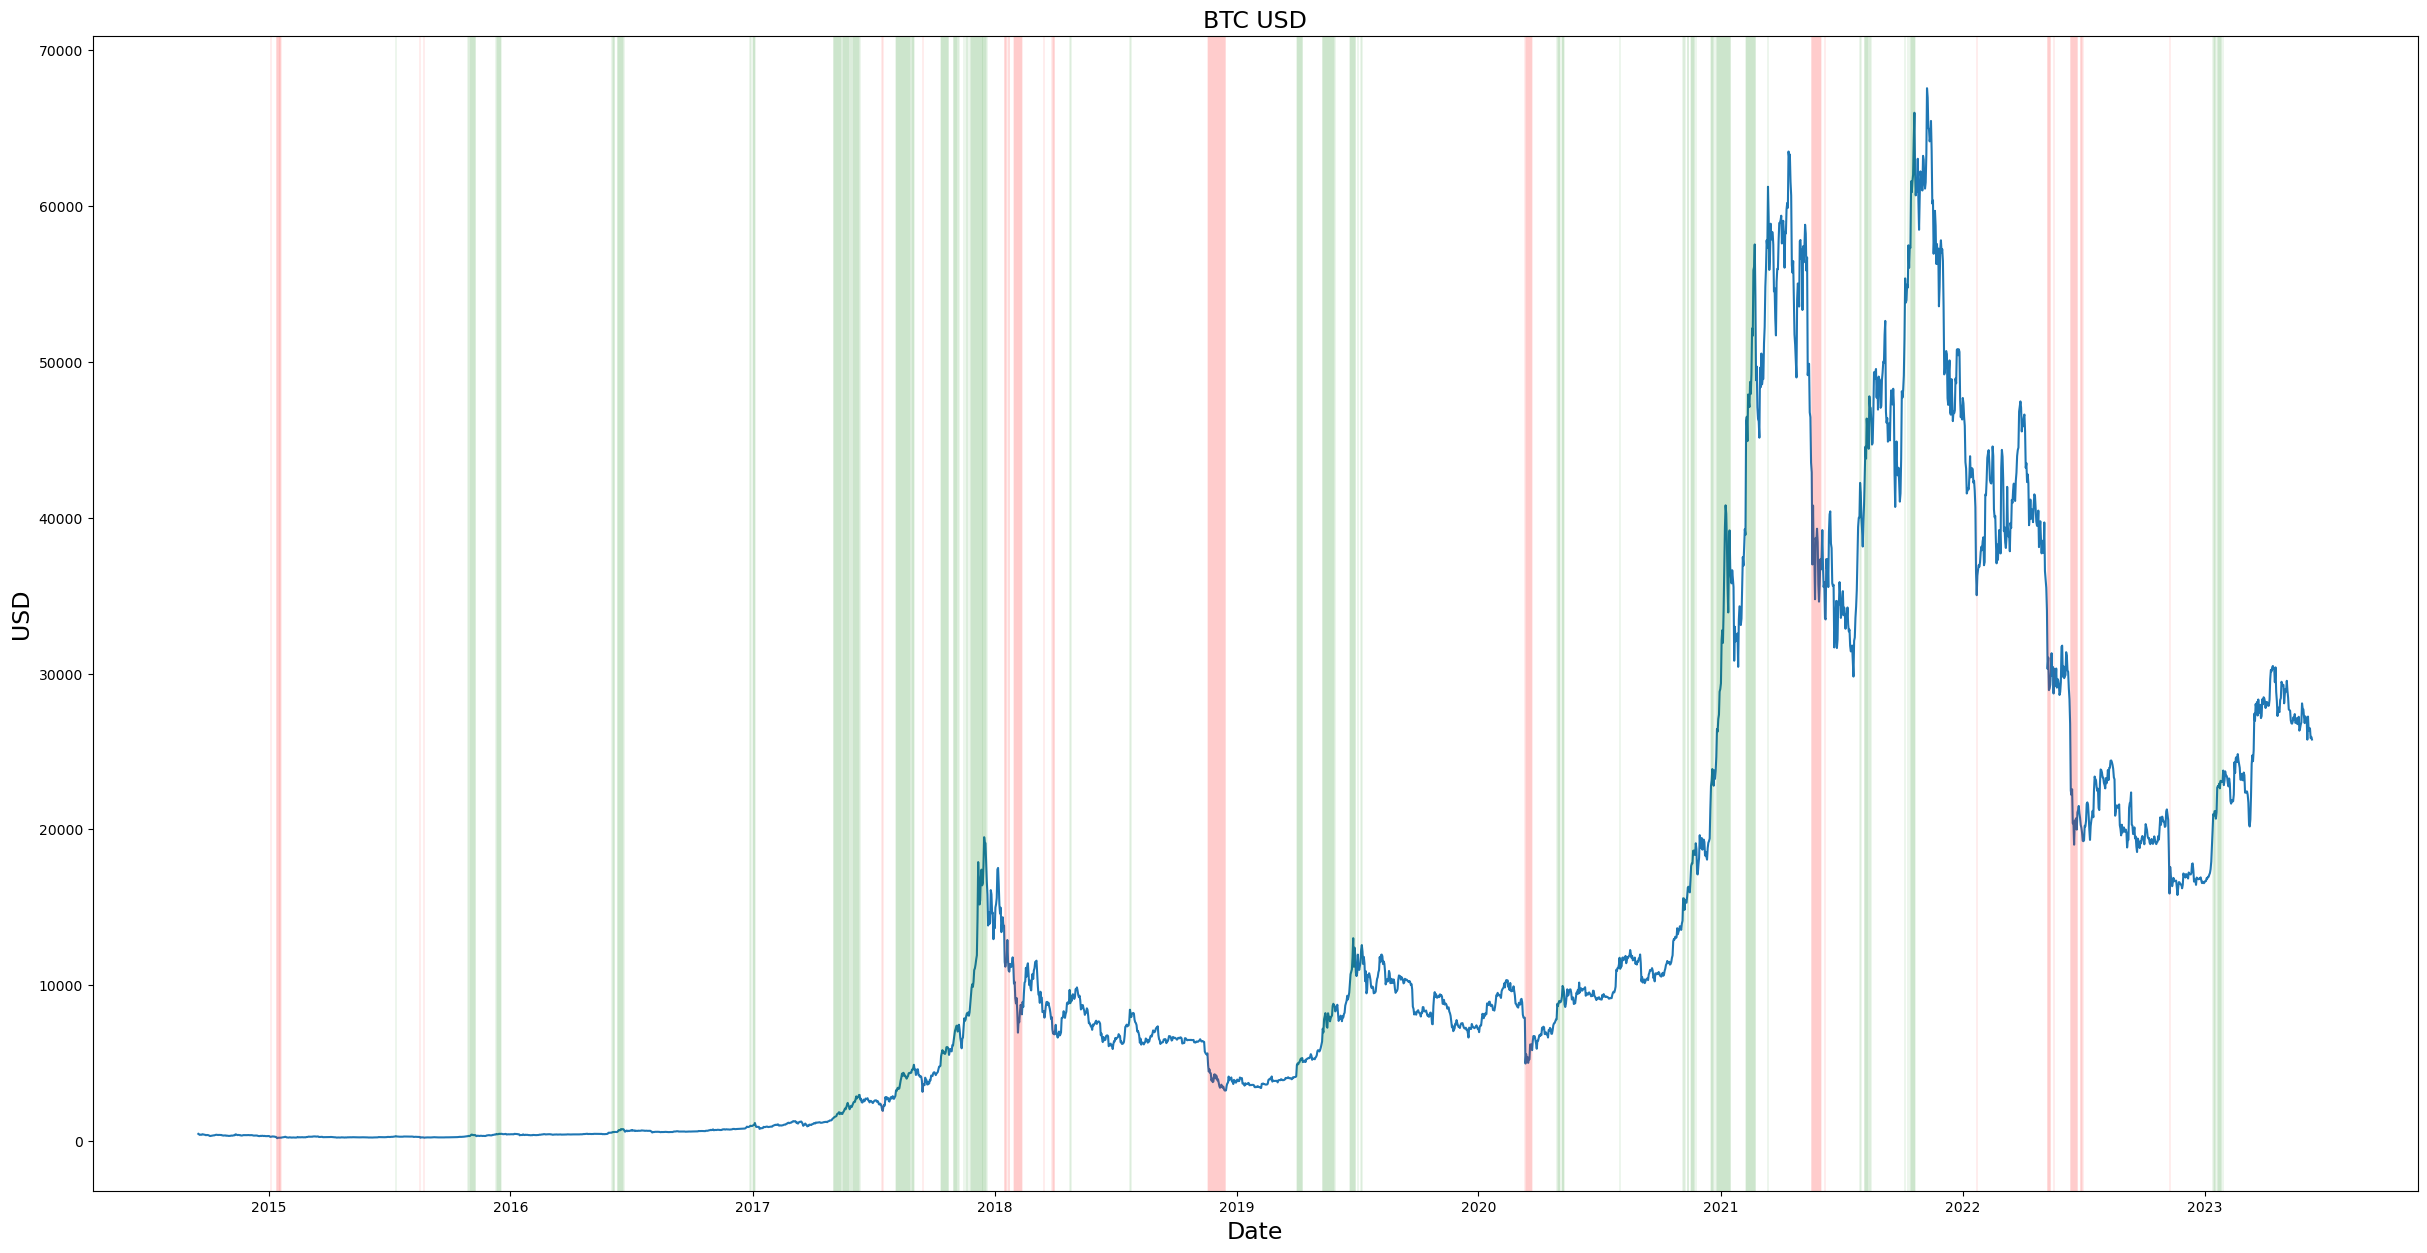

In [24]:
# basic plot
plt.figure(figsize=(30,15))
plt.plot(bitcoin_df["datetime"],bitcoin_df["Close"])
plt.xlabel("Date", size=17)
plt.ylabel("USD", size=17)
plt.title("BTC USD", size=17)
for row in bitcoin_df.itertuples(index=True, name='Pandas'):
    if getattr(row, 'sig_chg') == 1:
        plt.axvline(getattr(row, 'datetime'), color='green', linewidth=0.1)

for row in bitcoin_df.itertuples(index=True, name='Pandas'):
    if getattr(row, 'sig_chg') == -1:
        plt.axvline(getattr(row, 'datetime'), color='red', linewidth=0.1)
        
plt.show()

In [25]:
# total = 0
# for row in bitcoin_df.itertuples(index=True, name='Pandas'):
#     if getattr(row, 'sig_chg') == 1:
#         print(getattr(row, "datetime"))
#         total += 1
        
# print("Total 1's: " + str(total))